In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
path = r'C:\Users\Andrew\Desktop\Data project'

In [3]:
citi22 = pd.read_pickle(os.path.join(path, '02 data', 'clean', 'citi22.pkl'))

In [4]:
Trips_grouped = citi22

In [5]:
Trips_grouped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 892281 entries, 0 to 48584
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype          
---  ------                   --------------   -----          
 0   rideable_type            892281 non-null  object         
 1   started_at               892281 non-null  datetime64[ns] 
 2   ended_at                 892281 non-null  datetime64[ns] 
 3   start_station_name       892281 non-null  object         
 4   start_station_id         892281 non-null  object         
 5   end_station_name         892281 non-null  object         
 6   end_station_id           892281 non-null  object         
 7   start_latitude           892281 non-null  float64        
 8   start_longitude          892281 non-null  float64        
 9   end_latitude             892281 non-null  float64        
 10  end_longitude            892281 non-null  float64        
 11  member_type              892281 non-null  int32          
 12  sta

In [6]:
Trips_grouped['trip_mins'].astype('int')

0         1
1         6
2         5
3         0
4         0
         ..
48580    10
48581     5
48582     4
48583     3
48584     5
Name: trip_mins, Length: 892281, dtype: int32

In [7]:
Trips_grouped.loc[(Trips_grouped['trip_mins'] > 1440), 'Trip_group'] = '1 or more days'
Trips_grouped.loc[(Trips_grouped['trip_mins'] > 1080) & (Trips_grouped['trip_mins'] <= 1440), 'Trip_group'] = '18 to 24 hours'
Trips_grouped.loc[(Trips_grouped['trip_mins'] > 720) & (Trips_grouped['trip_mins'] <= 1080), 'Trip_group'] = '12 to 18 hours'
Trips_grouped.loc[(Trips_grouped['trip_mins'] > 360) & (Trips_grouped['trip_mins'] <= 720), 'Trip_group'] = '6 to 12 hours'
Trips_grouped.loc[(Trips_grouped['trip_mins'] > 180) & (Trips_grouped['trip_mins'] <= 360), 'Trip_group'] = '3 to 6 hours'
Trips_grouped.loc[(Trips_grouped['trip_mins'] > 60) & (Trips_grouped['trip_mins'] <= 180), 'Trip_group'] = '1 to 3 hours'
Trips_grouped.loc[(Trips_grouped['trip_mins'] > 30) & (Trips_grouped['trip_mins'] <= 60), 'Trip_group'] = '30 mins to 1 hour'
Trips_grouped.loc[(Trips_grouped['trip_mins'] > 15) & (Trips_grouped['trip_mins'] <= 30), 'Trip_group'] = '15 to 30 mins'
Trips_grouped.loc[Trips_grouped['trip_mins'] <= 15, 'Trip_group'] = 'Up to 15 mins'

In [8]:
Trips_grouped.head()

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_latitude,start_longitude,end_latitude,...,start day,weekday,month,TripMins,trip_mins,start_station_frequency,end_station_frequency,member,day_type,Trip_group
0,electric_bike,2022-01-26 18:50:39,2022-01-26 18:51:53,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,...,26,2,1,0 days 00:01:14,1.23,17060,17518,1,weekday,Up to 15 mins
1,classic_bike,2022-01-28 13:14:07,2022-01-28 13:20:23,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,...,28,4,1,0 days 00:06:16,6.27,5834,5989,1,weekday,Up to 15 mins
2,classic_bike,2022-01-10 19:55:13,2022-01-10 20:00:37,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,...,10,0,1,0 days 00:05:24,5.40,5834,5989,1,weekend,Up to 15 mins
3,electric_bike,2022-01-26 07:54:57,2022-01-26 07:55:22,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,...,26,2,1,0 days 00:00:25,0.42,17060,17518,1,weekday,Up to 15 mins
4,electric_bike,2022-01-13 18:44:46,2022-01-13 18:45:43,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,...,13,3,1,0 days 00:00:57,0.95,17060,17518,1,weekday,Up to 15 mins


In [9]:
Trips_grouped['Trip_group'].value_counts()

Up to 15 mins        725617
15 to 30 mins        103080
30 mins to 1 hour     44153
1 to 3 hours          16260
3 to 6 hours           1414
6 to 12 hours           847
12 to 18 hours          502
18 to 24 hours          298
1 or more days          110
Name: Trip_group, dtype: int64

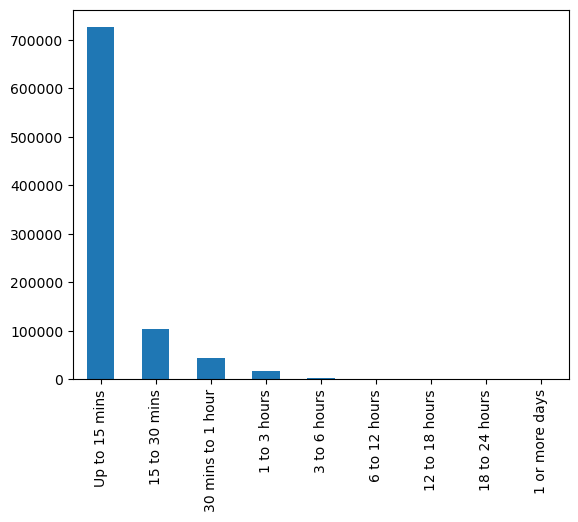

In [10]:
Trip_time_bar = Trips_grouped['Trip_group'].value_counts().plot.bar()

In [11]:
Trip_time_bar.figure.savefig(os.path.join(path, '04 Analysis', 'trip_times.png'))